,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages",Total:,White alone,Black or African American alone,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant,household size
1,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156477511
2,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630121927
3,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080219
4,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292434
5,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,55,0,55,0,30,25,9525,8932,593,2.128302732
6,Chinatown,6211,1844,254,451,3480,182,5477,1741,216,...,0,0,446,443,0,3,3272,2937,335,1.9628873
7,Dorchester,122191,27411,42714,25285,13360,13421,95365,24327,32678,...,291,0,936,0,0,936,47965,44823,3142,2.692323138
8,Downtown,13768,8730,569,967,3018,484,12975,8340,559,...,321,0,4124,3283,0,841,6604,5384,1220,1.731612184
9,East Boston,43066,15760,1403,21700,1932,2271,34826,14039,1136,...,132,0,109,0,0,109,18016,16695,1321,2.564420485


In [30]:
import pandas as pd
df = pd.read_csv('data/census.csv')

df = df.drop(0)
df = df.rename(columns={
    'tract20_nbhd': 'Neighborhood',
    'P0020001': 'Pop Total',
    'P0020005': 'Pop White',
    'P0020006': 'Pop Black',
    'P0020002': 'Pop Latino',
    'P002aapi': 'Pop AAPI',
    'P002others': 'Pop Other',
    'P0040001': 'Adults',
    'P0040005': 'Adults White',
    'P0040006': 'Adults Black',
    'P0040002': 'Adults Latino',
    'P004aapi': 'Adults AAPI',
    'P004others': 'Adults Other',
    'P00x0001': 'Children',
    'P00x0005': 'Children White',
    'P00x0006': 'Children Black',
    'P00x0002': 'Children Latino',
    'P00xaapi': 'Children AAPI',
    'P00xothers': 'Children Other',
    'hhpop': 'Household Population',
    'P0050001': 'Unknown',
    'P0050002': 'Institutionalized',
    'P0050007': 'Noninstitutionalized',
    'hhsize': 'Household Size'
})
df['Neighborhood'] = df['Neighborhood'].str.strip()
df = df.set_index('Neighborhood')
df = df.apply(pd.to_numeric)

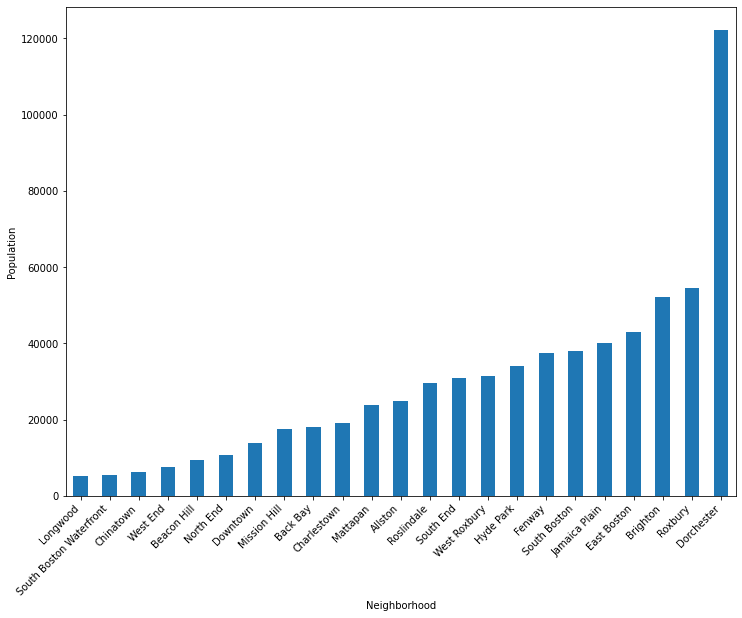

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
df['Pop Total'].sort_values().plot.bar()
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right');

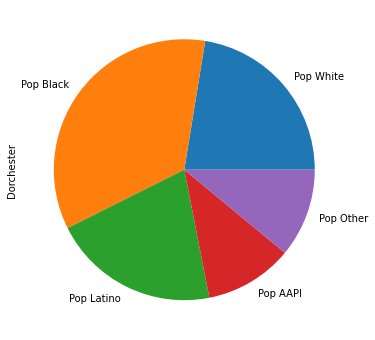

In [38]:
plt.figure(figsize=(6, 6))
dot = df.loc['Dorchester'][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
dot.plot.pie();

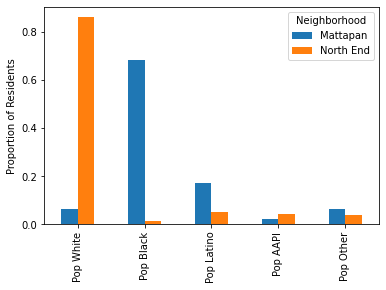

In [56]:
mvne = df.loc[['Mattapan', 'North End']][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
mvne = mvne.T / df.loc[['Mattapan', 'North End']]['Pop Total']

mvne.plot.bar()
plt.ylabel('Proportion of Residents');

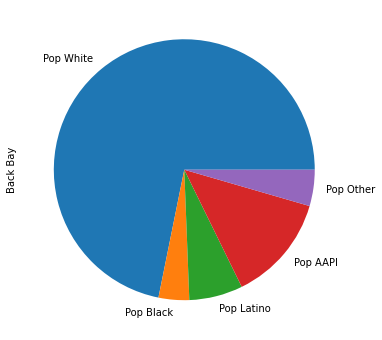

In [35]:
plt.figure(figsize=(6, 6))
bb = df.loc['Back Bay'][['Pop White', 'Pop Black', 'Pop Latino', 'Pop AAPI', 'Pop Other']]
bb.plot.pie();